In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
from asf_analysis.asf_data import ASFDataFile

## Working with individual data files

In [3]:
asf_data_filenames = glob.glob("..\\data\\sentinel-1\\*.SAFE\\measurement\\*.tiff")
asf_file = asf_data_filenames[0]

Load a single measurement array into a data file

In [4]:
asf_datafile = ASFDataFile(asf_file)

Annotation data is loaded automatically

In [5]:
print(asf_datafile.annotation_filename)

..\data\sentinel-1\S1A_IW_SLC__1SDV_20180606T141441_20180606T141508_022237_0267EB_EC03.SAFE\annotation\s1a-iw1-slc-vh-20180606t141443-20180606t141508-022237-0267eb-001.xml


In [6]:
print(asf_datafile.geo_bounds)

[[  41.08364918 -120.83964114]
 [  42.74025269 -121.51561604]
 [  41.23010369 -121.88101754]
 [  42.59359434 -120.4492047 ]]


In [7]:
print(*[f"{k}: {v}" for k, v in asf_datafile.asf_metadata.items()], sep="\n")

mission: s1a
beam_mode: iw1
product_type_resolution: slc
process_level_class_polarization: vh
start_date_time: 20180606t141443
end_date_time: 20180606t141508
absolute_orbit_number: 022237
mission_data_take_id: 0267eb
product_unique_identifier: 001


Measurement data is empty until explicitly loaded

In [9]:
print(asf_datafile.data_array)

None


In [10]:
asf_datafile.load_data_array()
print(asf_datafile.data_array.shape)

(13473, 21198)


Geo data can be pulled explicitly along with a downsampled version of the data array

In [11]:
skip_every = 50  # Skip 100 data points for every read data point
lat_grid, lon_grid, reduced_data_array = asf_datafile.get_geo_arrays(skip_every, skip_every)

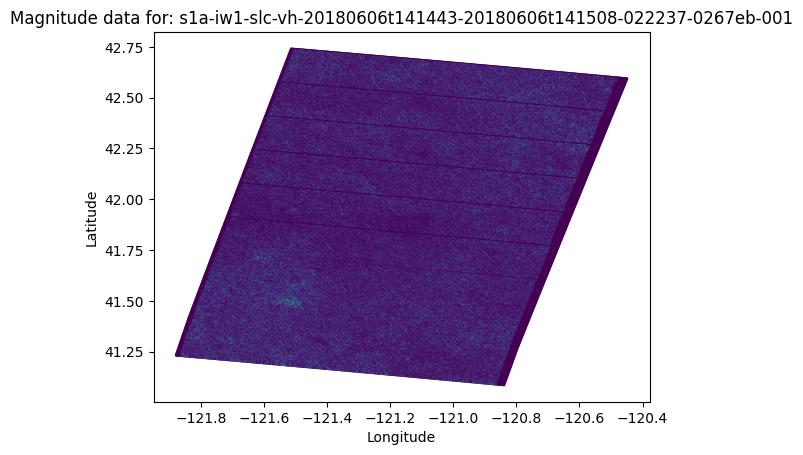

In [12]:
plt.scatter(lon_grid.flatten(), lat_grid.flatten(), c=np.abs(reduced_data_array), s=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Magnitude data for: {asf_datafile.filestem}")
plt.show()

## Working with zip archives or extracted scenes

In [14]:
from asf_analysis.asf_data import ASFDataScene

In [13]:
asf_scene_dirs = glob.glob("..\\data\\sentinel-1\\*.SAFE")
asf_scene_dir = asf_scene_dirs[0]

In [15]:
asf_datascene = ASFDataScene(asf_scene_dir, extracted=True)

_local_search_for_zipfile: safe_path = WindowsPath('../data/sentinel-1/S1A_IW_SLC__1SDV_20180606T141441_20180606T141508_022237_0267EB_EC03.SAFE')
_local_search_for_zipfile: search_str = '..\\data\\sentinel-1\\S1A_IW_SLC__1SDV_20180606T141441_20180606T141508_022237_0267EB_EC03.zip'
_local_search_for_zipfile: zips = ['..\\data\\sentinel-1\\S1A_IW_SLC__1SDV_20180606T141441_20180606T141508_022237_0267EB_EC03.zip']


Show extents of all sub-measurement files

In [18]:
asf_datascene.locate()
asf_datascene.corner_coordinates

[(-120.842606, 41.083923),
 (-123.8255, 41.476665),
 (-123.48111, 43.094376),
 (-120.418518, 42.702103)]

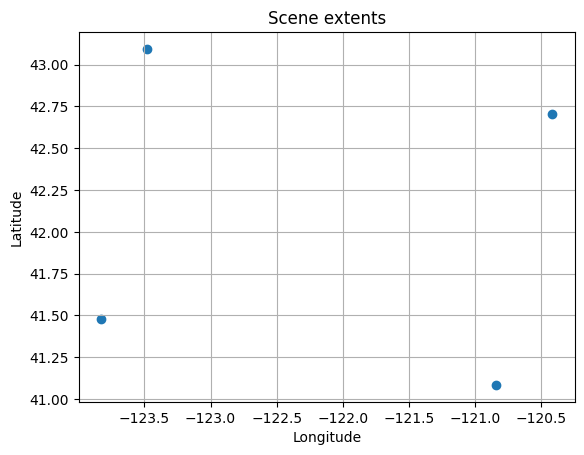

In [21]:
corner_coords = np.array(asf_datascene.corner_coordinates)
plt.scatter(corner_coords[:, 0], corner_coords[:, 1])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scene extents")
plt.grid()
plt.show()

Show plot preview image from downloaded archive

<Axes: >

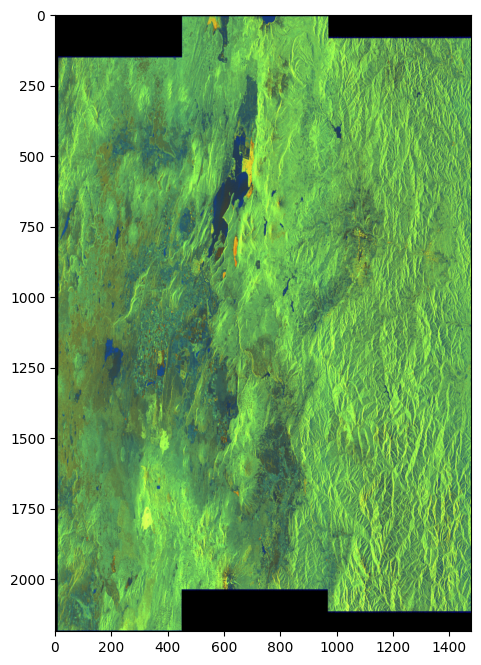

In [16]:
asf_datascene.plot_preview()